# Appendix 2. Color spaces

<img src="./images/YCbCr.png" width="250" align="left"/><img src="./images/rgb.png" width="300" align="rigth"/>

In this notebook, we will cover some important color spaces used in computer vision.

A **color model** is an abstract mathematical model describing the way in which colors can be represented as tuples of numbers.

In [1]:
import cv2
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt 
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
images_path = './images/'

In OpenCV, color images are read by default as BGR images:

In [2]:
image_bgr = cv2.imread(images_path + 'etsii.jpg',-1)
pixel_bgr = image_bgr[0,0,:]
print("BGR: ", pixel_bgr)

BGR:  [43 29 35]


There are more than 150 color-space conversion methods available in OpenCV. But we will look into two, which are the most widely used ones:  
BGR $\iff$ RGB and BGR $\iff$ YCrCb.

The following code lists the color-space conversions in the case of having an image coded in BGR:

In [3]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_BGR2')]
print(flags)

['COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_BGR2HSV_FULL', 'COLOR_BGR2LAB', 'COLOR_BGR2LUV', 'COLOR_BGR2Lab', 'COLOR_BGR2Luv', 'COLOR_BGR2RGB', 'COLOR_BGR2RGBA', 'COLOR_BGR2XYZ', 'COLOR_BGR2YCR_CB', 'COLOR_BGR2YCrCb', 'COLOR_BGR2YUV', 'COLOR_BGR2YUV_I420', 'COLOR_BGR2YUV_IYUV', 'COLOR_BGR2YUV_YV12']


For example, you can convert a BGR coded image into a RGB one by doing:

In [4]:
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
pixel_rgb = image_rgb[0,0,:]
print("BGR: ", pixel_bgr, "\nRGB: ", pixel_rgb)

BGR:  [43 29 35] 
RGB:  [35 29 43]


You already are familiar with **RGB** (and its color permutations) and **grayscale**. But, what about the **YCrCb** color space? Let's see how our favorite pixel from `image_bgr` looks in this sapce:

In [5]:
image_YCrCb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YCrCb)
pixel_YCrCb = image_YCrCb[0,0,:]

print("BGR:   ", pixel_bgr, "\nYCrCb: ", pixel_YCrCb)

BGR:    [43 29 35] 
YCrCb:  [ 32 130 134]


YCrCb is one of the multiple color models that separate intensity from color information (other examples are HSL, YUV, etc.). This means that:

- one image band is a copy of the grayscale image (containing pixel intensities, usually the first band), and
- the other two bands contain information about color (not pixel intensity).

<img src="./images/color_conversion.png" width="800" />

Let's see how the first band of `image_bgr`looks like in both, grayscale and YCrCb models:

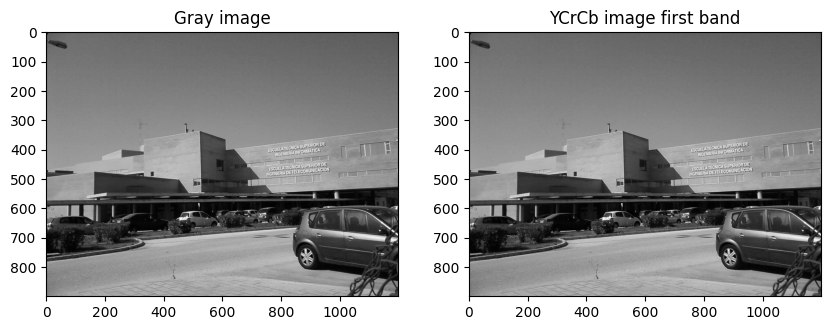

In [6]:
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

plt.figure(1)

plt.subplot(1,2,1)
plt.imshow(image_gray, cmap='gray')
plt.title('Gray image')

plt.subplot(1,2,2)
plt.imshow(image_YCrCb[:,:,0], cmap='gray')
plt.title('YCrCb image first band')

plt.show()

However, a remarkable difference between grayscale and YCrCb representations is that **an image coded in grayscale can not be reconverted to BGR or RGB**, since color information has been lost!

The YCrCb color space has many applications, like JPEG compression or object tracking. In this book, this color space is going to be used to **process color images like grayscale ones**. There are some methods like histogram equalization (notebook 2.3) that can not be applied to RGB images, so usually they process the first band of images codified in YCrCb (or a similar representation keeping pixel intensities) and then reconverted back to RGB.